## Lab 4 (January 31):
### Data Transformation

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 **Data Manipulation**
 - [Mutate, Transmute, Rename]()
 - [Group_by, Summarise]()
 - [Pipe operator]()  
 - [Putting it all together]()



 






> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [34]:
install.packages("gapminder")                      ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)                                 ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



> ## Next, we load our dataset for this lab

In [35]:
## gapminder Dataset
head(gapminder)
 

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [36]:
## iris Dataset
head(iris) 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


---

<br> <br>


# 1. Mutate, Transmute, Rename

## 1.1 Mutate

We can use `mutate` to **add new variables** and **preserve existing ones**. 
<br> <br>
Some useful **arguments** include:
- `.keep` =  `c("all", "used", "unused", "none")`
- `.before` -  optionally specifies the position of the new column
- `.after` - optionally specifies the position of the new column

<br><br>
Mutate uses functions and operations in creating new columns, some of which include:
- Mathematical: `+, -, *, /, ^, %%, log`
- Offsets: `lag(), lead()`
- Ranking: `dense_rank(), min_rank(), percent_rank(), row_number(), cume_dist(), ntile()`
- Cumulatives: `cumsum(), cummean(), cummin(), cummax(), cumany(), cumall()`
- Conditional: `na_if(), coalesce(), if_else(), recode(), case_when()` 

<br>
We will look at few examples below
<br>
<br>

## Example 1.1.1 (Basic)

In [37]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [38]:
## Create Sepal Area column as Sepal Width * Sepal Legth
iris1 <- mutate(iris, Sepal.Area = Sepal.Width * Sepal.Length)
head(iris1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,17.85
2,4.9,3.0,1.4,0.2,setosa,14.70
3,4.7,3.2,1.3,0.2,setosa,15.04
4,4.6,3.1,1.5,0.2,setosa,14.26
5,5.0,3.6,1.4,0.2,setosa,18.00
6,5.4,3.9,1.7,0.4,setosa,21.06


In [39]:
## Create Sepal Area column as Sepal Width * Sepal Legth
## Make this column come before Sepal length

iris1 <- mutate(iris, Sepal.Area = Sepal.Width * Sepal.Length,
                      .before = Sepal.Length)
head(iris1)

,Sepal.Area,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17.85,5.1,3.5,1.4,0.2,setosa
2,14.70,4.9,3.0,1.4,0.2,setosa
3,15.04,4.7,3.2,1.3,0.2,setosa
4,14.26,4.6,3.1,1.5,0.2,setosa
5,18.00,5.0,3.6,1.4,0.2,setosa
6,21.06,5.4,3.9,1.7,0.4,setosa


**_Note_**: One beautiful thing about `mutate` is that you can create multiple columns, some of which may depend on those being created at the same time

In [40]:
## Create Sepal Area column as Sepal Width * Sepal Legth
## Update this area by scaling it by a factor of 10
iris1 <- mutate(iris, Sepal.Area = Sepal.Width * Sepal.Length,
               Scaled.Sepal.Area = Sepal.Area*10)
head(iris1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area,Scaled.Sepal.Area
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,17.85,178.5
2,4.9,3.0,1.4,0.2,setosa,14.70,147.0
3,4.7,3.2,1.3,0.2,setosa,15.04,150.4
4,4.6,3.1,1.5,0.2,setosa,14.26,142.6
5,5.0,3.6,1.4,0.2,setosa,18.00,180.0
6,5.4,3.9,1.7,0.4,setosa,21.06,210.6


In [41]:
## We want to keep only those used columns alongside the new columns
iris1 <- mutate(iris, Sepal.Area = Sepal.Width * Sepal.Length,
               Scaled.Sepal.Area = Sepal.Area*10,
               .keep = "used")
head(iris1) 

,Sepal.Length,Sepal.Width,Sepal.Area,Scaled.Sepal.Area
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,17.85,178.5
2,4.9,3.0,14.70,147.0
3,4.7,3.2,15.04,150.4
4,4.6,3.1,14.26,142.6
5,5.0,3.6,18.00,180.0
6,5.4,3.9,21.06,210.6


**_Note_:** We can use mutate to delete a column by setting the column name to `NULL`


In [42]:
## Remove Species column
iris1 <- mutate(iris, Species = NULL)
head(iris1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


## Exaple 1.1.2 (Using functions)

In [43]:
## To add row id, use the row_number function
## use toupper to convert characters to upper cases 
iris1 <- mutate(iris, ID = row_number(),
                Species.Upper = toupper(Species)
                )
head(iris1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,ID,Species.Upper
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa,1,SETOSA
2,4.9,3.0,1.4,0.2,setosa,2,SETOSA
3,4.7,3.2,1.3,0.2,setosa,3,SETOSA
4,4.6,3.1,1.5,0.2,setosa,4,SETOSA
5,5.0,3.6,1.4,0.2,setosa,5,SETOSA
6,5.4,3.9,1.7,0.4,setosa,6,SETOSA


In [44]:
## use lag and lead to get earlier and later rows respectively
iris1 <- mutate(iris, previous = lag(Sepal.Length),
                      future = lead(Sepal.Length)
                    )
head(iris1)                    

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,previous,future
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,NA,4.9
2,4.9,3.0,1.4,0.2,setosa,5.1,4.7
3,4.7,3.2,1.3,0.2,setosa,4.9,4.6
4,4.6,3.1,1.5,0.2,setosa,4.7,5.0
5,5.0,3.6,1.4,0.2,setosa,4.6,5.4
6,5.4,3.9,1.7,0.4,setosa,5.0,4.6


In [45]:
## Using case_when to create a conditional variable, Size
## if Sepal length is less than the average, assign the value "small"
## if it is less than the average, assign small, else assign medium

iris1 <- mutate(iris, Size = case_when(
                 Sepal.Length < mean(Sepal.Length) ~ "small",
                 Sepal.Length > mean(Sepal.Length) ~ "large",
                   TRUE ~ "medium"))

                  
head(iris1) ## get just the first few (6) rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Size
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa,small
2,4.9,3.0,1.4,0.2,setosa,small
3,4.7,3.2,1.3,0.2,setosa,small
4,4.6,3.1,1.5,0.2,setosa,small
5,5.0,3.6,1.4,0.2,setosa,small
6,5.4,3.9,1.7,0.4,setosa,small


<br>  
## 1.2 Transmute
`transmute` works exactly like `mutate`, the only difference being that only newly created columns produce in our new dataset (tibble). It is exactly the same as setting `.keep = "none"` 

## Example 1.2.1

In [46]:
## Create Sepal Area and Scaled Sepal Area columns as a separate dataset
iris2 <- transmute(iris, Sepal.Area = Sepal.Width * Sepal.Length,
               Scaled.Sepal.Area = Sepal.Area*10)
head(iris2) 

,Sepal.Area,Scaled.Sepal.Area
,<dbl>,<dbl>
1,17.85,178.5
2,14.70,147.0
3,15.04,150.4
4,14.26,142.6
5,18.00,180.0
6,21.06,210.6


In [47]:
## Alternatively
## Create Sepal Area and Scaled Sepal Area columns as a separate dataset using mutate
iris2 <- mutate(iris, Sepal.Area = Sepal.Width * Sepal.Length,
               Scaled.Sepal.Area = Sepal.Area*10,
               .keep = "none")
head(iris2 )

,Sepal.Area,Scaled.Sepal.Area
,<dbl>,<dbl>
1,17.85,178.5
2,14.70,147.0
3,15.04,150.4
4,14.26,142.6
5,18.00,180.0
6,21.06,210.6


<br>

## 1.3 Rename
We use `rename` to rename existing column names

## Example 1.3.1

In [48]:
## dots(.) are not recommended for variable names.
## rename all columns names in the iris dataset but displacing . with _
iris3 <- rename(iris, sepal_length = Sepal.Length,
                      sepal_width = Sepal.Width,
                      petal_length = Petal.Length,
                      petal_width = Petal.Width
                      )
head(iris3)                      


,sepal_length,sepal_width,petal_length,petal_width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


<br><br> More functions about `mutate` can be foundd [here](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf)  
 
---
<br><br>



# 2. Summarise and Group By
`summarise` is used to compute a new dataset (tibble) by using agrregation functions. 
It is usually useful when used with `group_by`, as this helps to compute summaries for each category of a column of a dataset.

The visualization below helps to better understand how `group_by` with `summarise` works

<br><br>
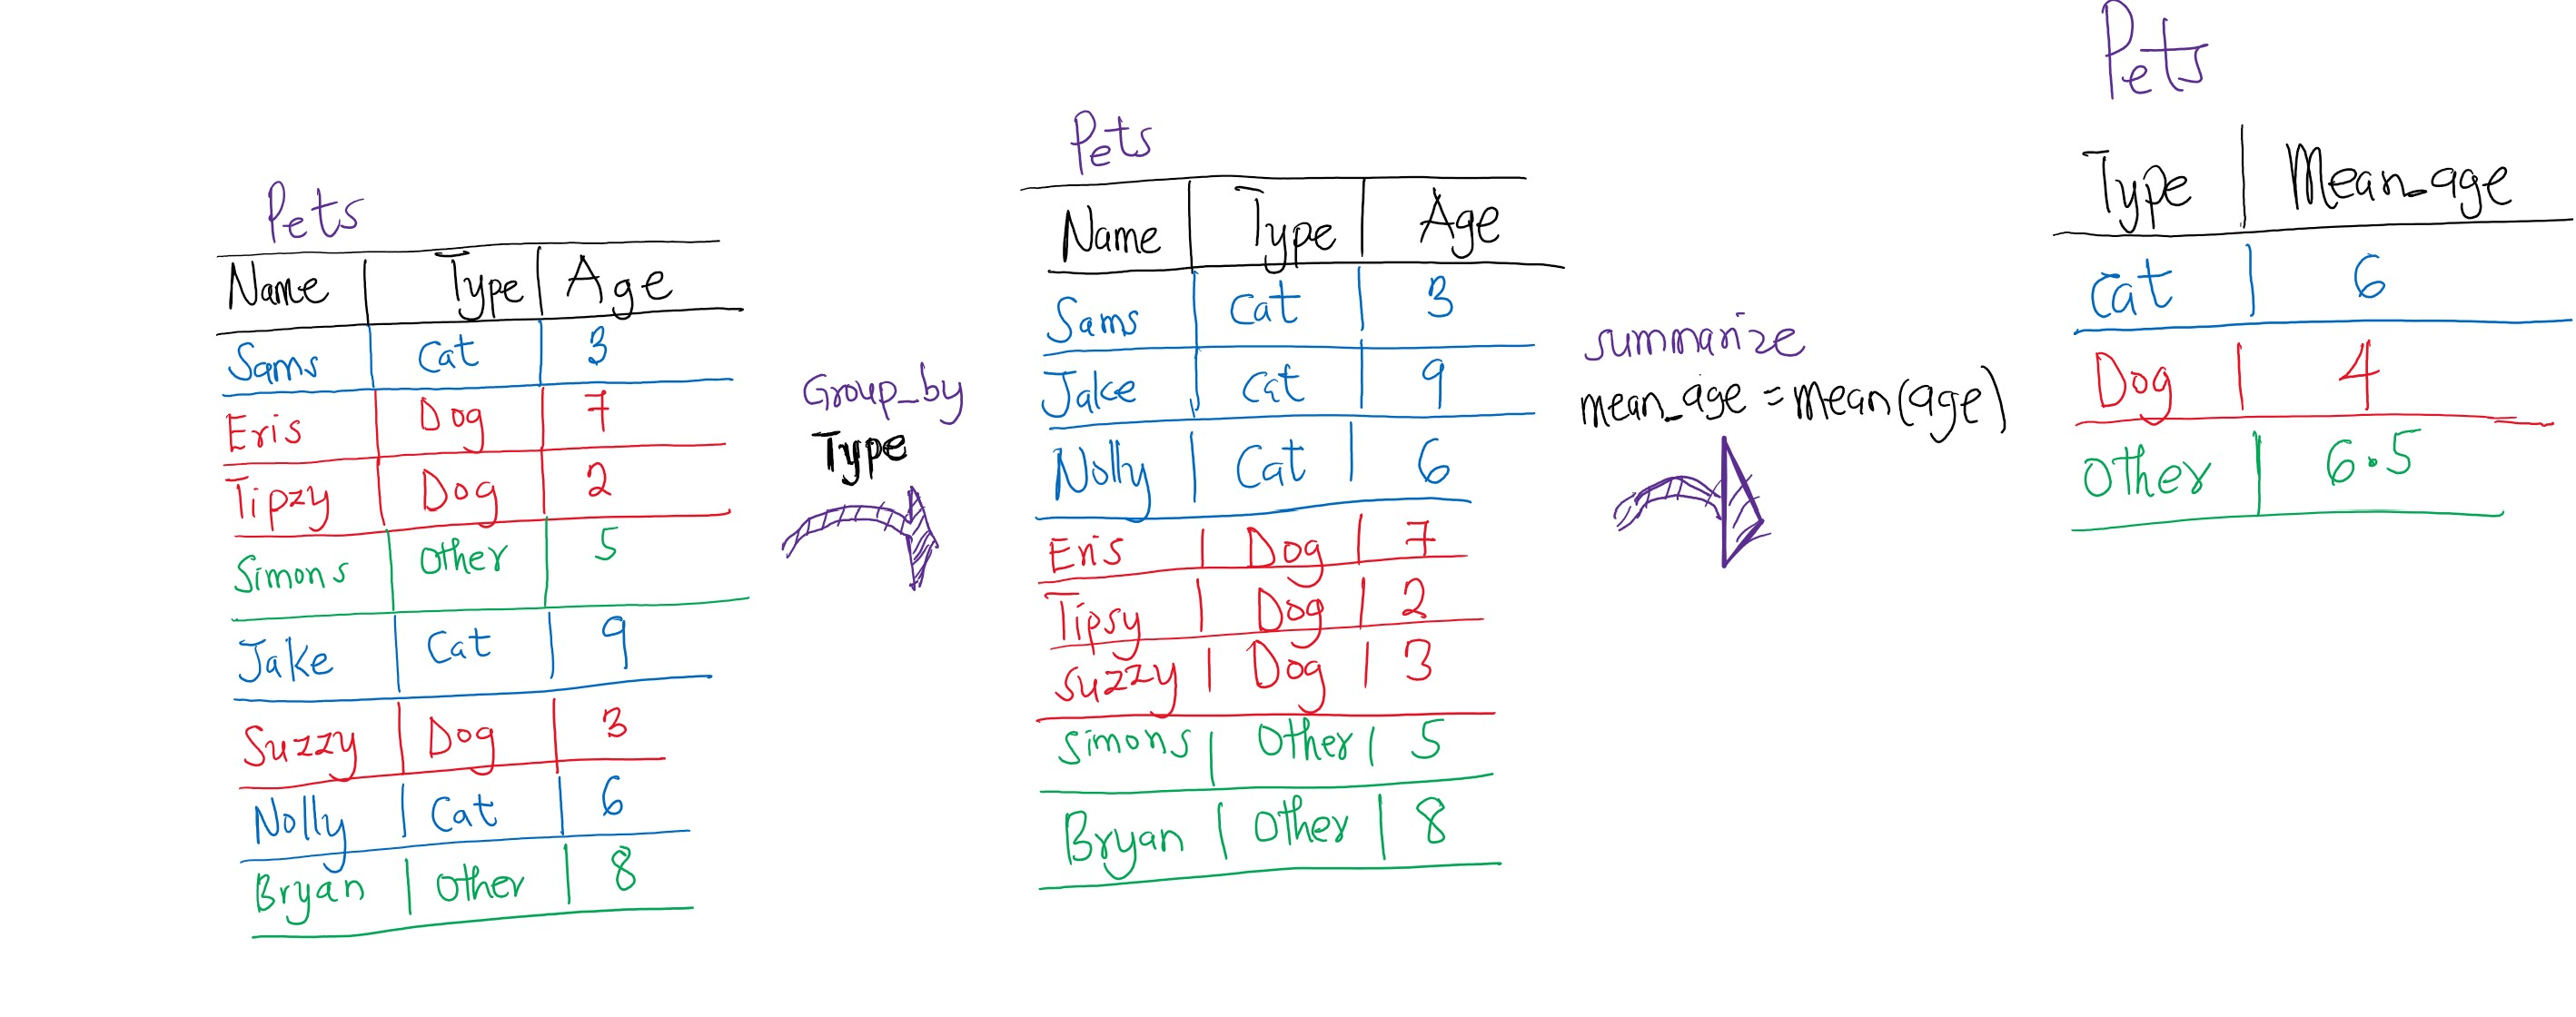
<br><br>
Some useful aggregation functions include:
- Center: `mean(), median()`
- Spread: `sd(), IQR(), mad()`
- Range: `min(), max(), quantile()
- Position: `first(), last(), nth()`
- Count: `n(), n_distinct()`
- Logical: `any(), all()`




## Example 2.1 (summarise for entire dataset)

In [50]:
## Find the mean of Sepal Width and Sepla Length for the iris dataset
summarise(iris, mean_sep_width = mean(Sepal.Width), 
          mean_sep_length = mean(Sepal.Length)
          )


mean_sep_width,mean_sep_length
<dbl>,<dbl>
3.057333,5.843333


**_Challenge_:** What does the code below do?

In [51]:
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [52]:
summarise(iris, n = n(), 
             unique= n_distinct(Species),
             first = first(Species), 
             last = last(Species),
             `30st` = nth(Species, 30))

n,unique,first,last,30st
<int>,<int>,<fct>,<fct>,<fct>
150,3,setosa,virginica,setosa


## Example 2.1 (summarise by groups)

In [54]:
## Group the iris dataset byyy Species
(by_group <- group_by(iris, Species)) 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [55]:
## Group by Species and take the mean for Sepal Length and Width
## Group the iris dataset byyy Species
by_group <- group_by(iris, Species)
summarise(by_group, mean_sep_length = mean(Sepal.Length),
          mean_sep_width = mean(Sepal.Width)
          )

Species,mean_sep_length,mean_sep_width
<fct>,<dbl>,<dbl>
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


<br><br>
# 3. The Pipe Operator (%>%)
As you probably saw from the previous example, it is extraneous to be storing intermediate steps while completing a chain of tasks. The pipe operator (`%>%`) helps up eliminate this hassle. 
<br>

Consider how the pipe (`%>%`) can help eliminate such hassle in the following sequence (chain) of tasks:

<br>

- Filter the `iris` dataset for Petal Length greater than 1 and Sepal Width less than 3.3
- Select Sepal Length, Sepal Width and Species
- Rename the columns of Sepal Width and Sepal Length by displacing dot(.) with underscore(_)
- Convert the Species column to uppercase
- Group the resulting dataset by species and compute the 50th percentile and the mean for each group

<br>

**_Note_:** An easier way to understand the pipe (`%>%`) operator is reading it as "and then"

In [56]:
## Using piping to accomplish the above task:
iris %>%                                                ## then
    filter(Petal.Length > 1 & Sepal.Width < 3.3) %>%    ## and then
    select(Sepal.Length, Sepal.Width, Species) %>%      ## and then
    rename(sepal_length = Sepal.Length,
           sepal_width = Sepal.Width,) %>%              ## and then
    mutate(Species = toupper(Species)) %>%              ## and then
    group_by(Species) %>%                               ## and then
    summarise(mean_sep_length = mean(sepal_length),
              mean_sep_width = mean(sepal_width),
              `50th_tile_sep_len` = quantile(sepal_length, 0.5),
              `50th_tile_sep_width` = quantile(sepal_width, 0.5)
              )
    

Species,mean_sep_length,mean_sep_width,50th_tile_sep_len,50th_tile_sep_width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SETOSA,4.688235,3.035294,4.70,3.10
VERSICOLOR,5.927083,2.745833,5.85,2.80
VIRGINICA,6.533333,2.876190,6.45,2.95


# 4. Challenge
Complete the following tasks: 

## 4.1 Gapminder Dataset
- subset for European and Asian countries excluding Japan, Norway and Israel
- scale the population by dividing by 1000
- select all columns aside from those ending with "y"
- sort the resulting tibble by continent ascending and gdp per capita in descending order
- Retain only rows 5 to 20

**Question:** What is the first row?

In [57]:
gapminder %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [58]:
## Your code here
gapminder %>% ## then
    filter(continent %in% c("Europe", "Asia"), !country %in% c("Japan", "Norway", "Israel")) %>%
    mutate(`scaled pop` = pop/1e3) %>%
    select(!ends_with("y")) %>%
    arrange(continent, desc(gdpPercap)) %>%
    slice(5:20)




continent,year,lifeExp,pop,gdpPercap,scaled pop
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
Asia,1967,64.624,575003,80894.88,575.003
Asia,1977,69.343,1140357,59265.48,1140.357
Asia,2007,77.588,2505559,47306.99,2505.559
Asia,2007,79.972,4553009,47143.18,4553.009
Asia,1997,76.156,1765345,40300.62,1765.345
Asia,2007,82.208,6980412,39724.98,6980.412
Asia,2002,78.770,4197776,36023.11,4197.776
Asia,2002,76.904,2111561,35110.11,2111.561
Asia,1992,75.190,1418095,34932.92,1418.095


## 4.2 Gapminder Dataset
- group the dataset by year and continent
- compute the total population (*hint:* use `sum()`), mean life expectancy and count the number of cases for each group
- make a scatterplot of year by total population for each continent. The plots should be separate for each continent.

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



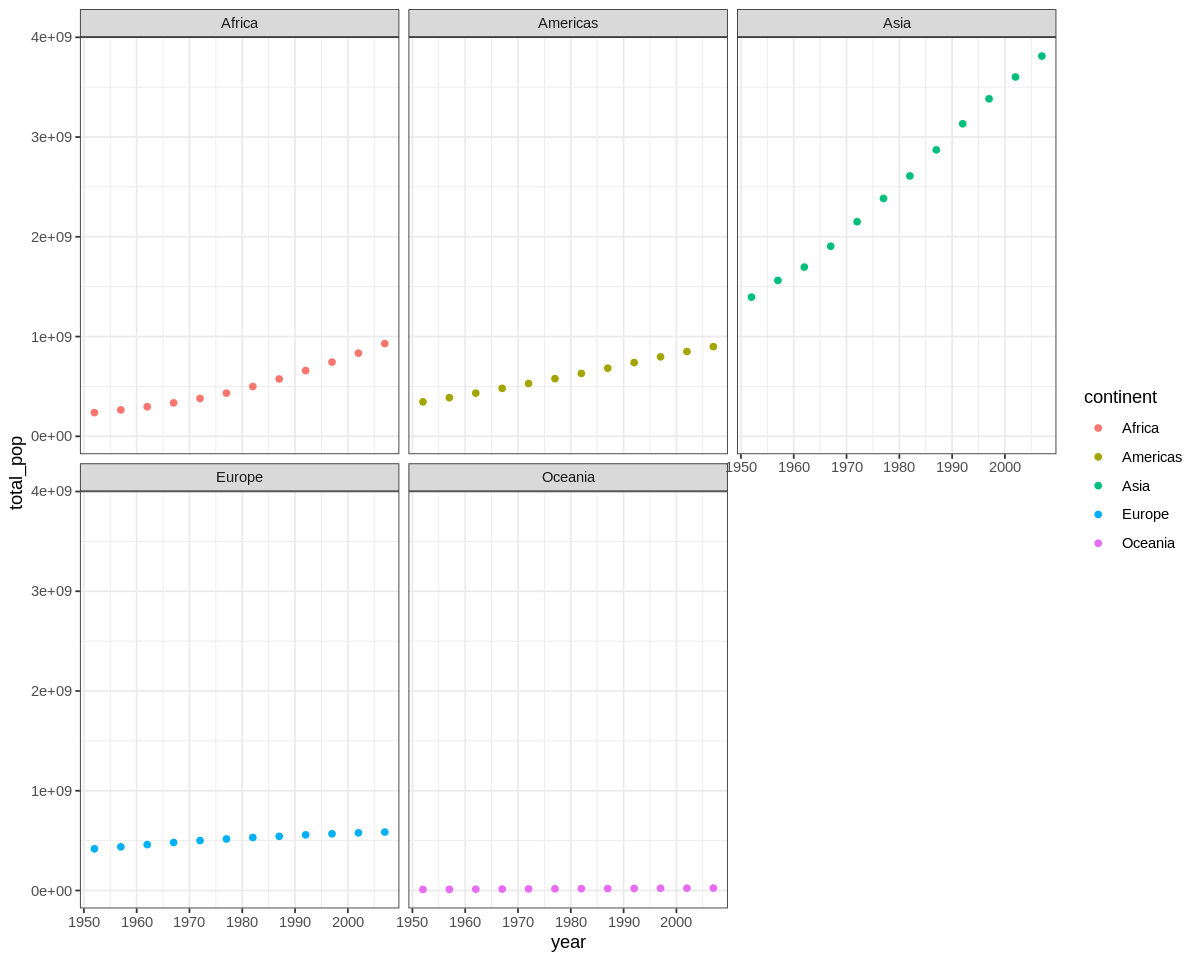

In [59]:
## Your code here
gapminder %>%
   group_by(year, continent) %>%
   summarise(total_pop = sum(pop),
             mean_life_expt = mean(lifeExp),
             counts = n()) %>%
   ggplot(aes(x = year, y = total_pop, color = continent)) +
   geom_point() +
   facet_wrap(~ continent) +
   theme_bw() ## add black and white background
  

## 4.3 Gapmider Dataset
- subset for only the year 2007
- group by continent
- compute the mean life expectancy and count the number of cases for each group
- create:
  + a bar chart for continent's mean life expectancy, where the bars are horizontal than vertical
  + create a pie chart for the counting variable
     - fill by continent
     - add texts superimposing the counts of each continent on the pie chart _[hint]_: [geom_text](https://ggplot2.tidyverse.org/reference/geom_text.html) or [geom_label](https://ggplot2.tidyverse.org/reference/geom_text.html) 
     - move the legend to the bottom position than the right position


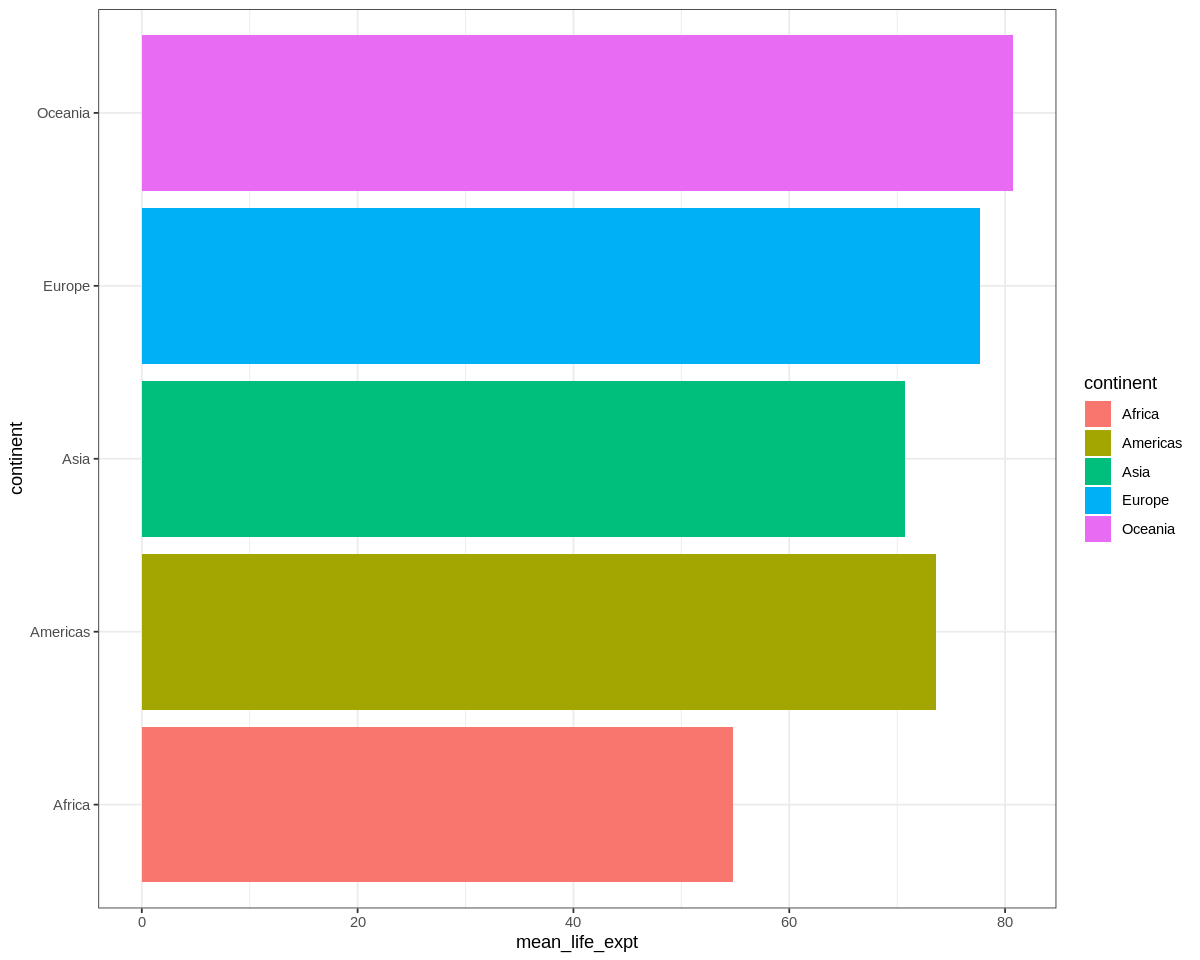

In [60]:
## Your code here
df <- gapminder %>%
        filter(year == 2007) %>%
        group_by(continent) %>%
        summarise(mean_life_expt = mean(lifeExp),
                  counts = n())

## (1) making the bar chart
df %>% ggplot() +
         geom_col(mapping = aes(x = continent, y = mean_life_expt, fill = continent)) +
         coord_flip() + ## making bars horizontal 
         theme_bw()  ## black and white theme


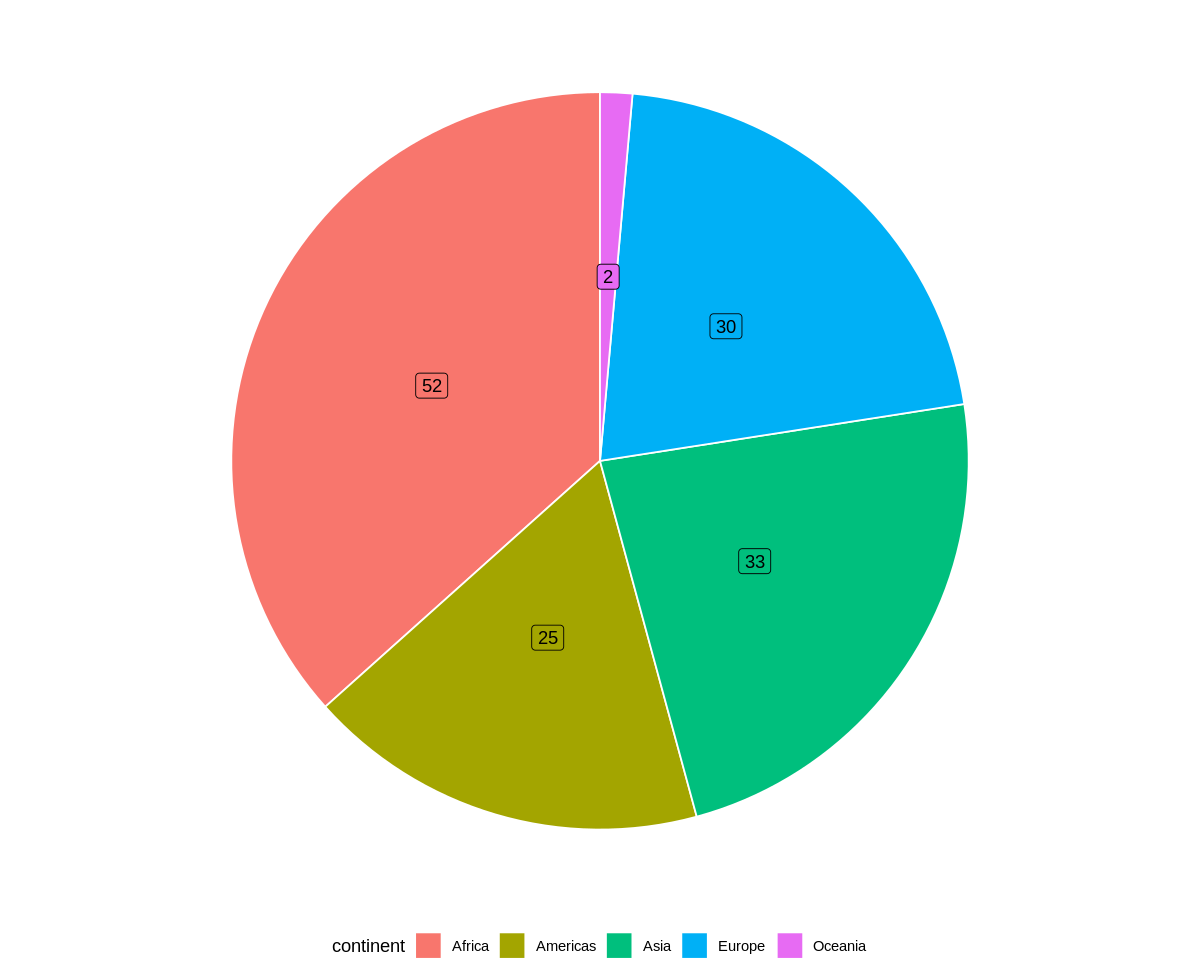

In [61]:
## (2) making pie chart
df %>% ggplot(mapping = aes(x = 1, y = counts, fill = continent)) +
         geom_col(width = 1, color = "white") +
         coord_polar(theta = "y") +
         ## adding labels
         geom_label(mapping = aes(label = counts), ## alternatively use geom_text which has no border around the labels
                    color = "black",               ## border colr
                    position = position_stack(vjust = 0.5), 
                    show.legend = FALSE) +
         theme_void() +                            ## clears backgrond
         theme(legend.position = "bottom")         ## move legend to bottom
